In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from keras.src.utils import load_img
from PIL import Image

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
trainPathToLocal = "images/train/"
trainPathToKaggle = "/kaggle/input/face-expression-recognition-dataset/images/train/"
validationPathToLocal = "images/validation/"
validationPathToKaggle = "/kaggle/input/face-expression-recognition-dataset/images/validation/"

trainPath = trainPathToLocal if os.path.exists(trainPathToLocal) else trainPathToKaggle
validationPath = validationPathToLocal if os.path.exists(validationPathToLocal) else validationPathToKaggle

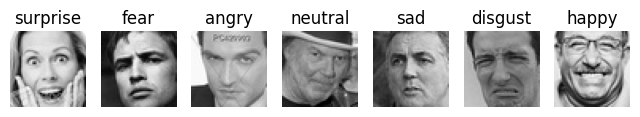

In [3]:
i = 1
plt.figure(figsize=(8, 8))
for expression in os.listdir(validationPath):
    img = load_img((validationPath + expression + '/' + os.listdir(validationPath + expression)[0]))
    plt.subplot(1, 7, i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1

plt.show()

# Check the amount of data in each folder in training dataset

In [4]:
for expression in os.listdir(trainPath):
    print(expression, "folder contains\t\t", len(os.listdir(trainPath + expression)), "images")

surprise folder contains		 3205 images
fear folder contains		 4103 images
angry folder contains		 3993 images
neutral folder contains		 4982 images
sad folder contains		 4938 images
disgust folder contains		 436 images
happy folder contains		 7164 images


# Check the amount of data in each folder in testing dataset

In [5]:
for expression in os.listdir(validationPath):
    print(expression, "folder contains\t\t", len(os.listdir(validationPath + expression)), "images")

surprise folder contains		 797 images
fear folder contains		 1018 images
angry folder contains		 960 images
neutral folder contains		 1216 images
sad folder contains		 1139 images
disgust folder contains		 111 images
happy folder contains		 1825 images


In [6]:
train_images = []
for expression in os.listdir(trainPath):
    for i in range(len(os.listdir(trainPath + expression))):
        train_images.append(trainPath + expression + '/' + os.listdir(trainPath + expression)[i])

In [7]:
len(train_images)

28821

In [8]:
trainImages = np.zeros((len(train_images), 48, 48))
for i in range(len(train_images)):
    trainImages[i] = np.array(Image.open(train_images[i]))

In [9]:
trainImages

array([[[252., 255., 253., ..., 255., 255., 254.],
        [255., 253., 255., ..., 252., 255., 253.],
        [254., 252., 253., ..., 254., 252., 255.],
        ...,
        [ 22.,  24.,  25., ...,  59., 102., 100.],
        [ 25.,  17.,  15., ...,  53.,  95.,  91.],
        [ 19.,  21.,  19., ...,  44.,  77.,  99.]],

       [[253., 255., 253., ..., 252., 253., 252.],
        [255., 252., 255., ..., 255., 254., 255.],
        [255., 255., 253., ..., 254., 254., 253.],
        ...,
        [255., 255., 255., ..., 252., 254., 255.],
        [254., 255., 253., ..., 255., 255., 254.],
        [255., 255., 255., ..., 249., 249., 255.]],

       [[204., 107., 138., ...,  77.,  65.,  87.],
        [194., 106., 142., ...,  94.,  71.,  64.],
        [200., 109., 145., ..., 106.,  89.,  75.],
        ...,
        [126.,  13.,   5., ..., 101., 105., 109.],
        [110.,  20.,  62., ..., 102., 109., 106.],
        [143., 161., 219., ..., 100., 108., 102.]],

       ...,

       [[ 33.,  17.,  23

In [10]:
trainImages.shape

(28821, 48, 48)

In [11]:
# Create a list of all images in testing dataset
validation_images = []
for expression in os.listdir(validationPath):
    for i in range(len(os.listdir(validationPath + expression))):
        validation_images.append(validationPath + expression + '/' + os.listdir(validationPath + expression)[i])

In [12]:
len(validation_images)

7066

In [13]:
validationImages = np.zeros((len(validation_images), 48, 48))
for i in range(len(validation_images)):
    validationImages[i] = np.array(Image.open(validation_images[i]))

In [14]:
validationImages

array([[[255., 252., 249., ..., 224., 252., 252.],
        [253., 255., 232., ..., 204., 232., 255.],
        [253., 247., 218., ..., 195., 213., 244.],
        ...,
        [223., 206., 128., ..., 141.,  62.,  28.],
        [183., 223., 161., ..., 122.,  29.,  31.],
        [181., 183., 192., ...,  92.,   9.,  44.]],

       [[ 31.,  37.,  42., ...,  64.,  74.,  76.],
        [ 29.,  38.,  48., ...,  75.,  73.,  82.],
        [ 31.,  41.,  54., ...,  86.,  69.,  85.],
        ...,
        [132., 125., 100., ...,  31.,  26.,  28.],
        [144., 137., 113., ...,  27.,  32.,  30.],
        [163., 152., 155., ...,  28.,  33.,  30.]],

       [[ 69., 114., 207., ...,  88.,  23.,  64.],
        [ 90., 141., 193., ...,  90.,  18.,  32.],
        [ 56., 153., 183., ...,  94.,  16.,  52.],
        ...,
        [ 42.,  45.,  35., ...,  24.,  53.,  76.],
        [ 40.,  41.,  45., ...,  33.,  60.,  74.],
        [ 44.,  39.,  42., ...,  24.,  63.,  76.]],

       ...,

       [[ 51., 140.,  29

In [15]:
validationImages.shape

(7066, 48, 48)